# ML HW3
### 106598018 萬俊瑋

**1. In this problem, you are asked to use ICA on Iris dataset for dimensionality reduction before classification. To simplify the problem, you do not need to implement the ICA program. Instead, find an existing one and learn how to use it. As you may not be able to store internal parameters of the ICA, input all of the 150 samples to find the corresponding independent components as the preprocessing step. You may assume that there are four sources and four
observations. On the obtained four components, pick the two components with largest energy as new features. Randomly pick 70 % of the samples (represented by new features) as training set and the rest as test set. Implement the 3-NN classifier to compute the accuracy. Repeat the drawing and the 3-NN classification 10 times and compute the average accuracy and accuracy variance. For simplicity, use the Euclidean distance in the k-NN computation.**

load dataset

In [1]:
%matplotlib inline

if __name__=='__main__':
    import pandas as pd
    iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
    X, y = iris.iloc[:, :4].values, iris[4].values

ICA dimensionality reduction on Iris dataset

importing Jupyter notebook from HW2.ipynb


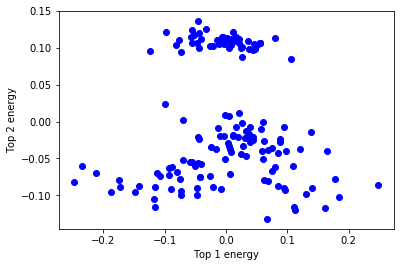

In [2]:
if __name__=='__main__':
    from sklearn.decomposition import FastICA
    ica=FastICA(n_components=4)
    X_ica = ica.fit_transform(X)

    import numpy as np
    energy = [np.sum(X_ica[:, i]**2) for i in range(4)]
    idx = np.argsort(energy)[::-1]
    X_ica_top2_energy = np.array([[x[idx[0]], x[idx[1]]] for x in X_ica])

    import import_ipynb
    from HW2 import plotData
    # print data info after ICA
    plotData(X_ica_top2_energy, 'Top 1 energy', 'Top 2 energy')

3-NN 10 Times

3-NN result


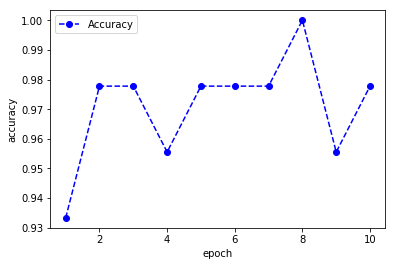

average acc:0.971111111111111
varance of acc:0.0003012345679012339


In [3]:
if __name__=='__main__':
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import random

    # create model
    acc = list()
    for i in range(10):
        # spilt data randomly
        X_train, X_test, y_train, y_test = train_test_split(X_ica_top2_energy, y, test_size = 0.3,\
                                                            random_state=random.randint(0, 100))
        # create model
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        # predict data
        y_pred = knn.predict(X_test)
        acc.append(metrics.accuracy_score(y_test, y_pred))

    # plot & print th result
    print('3-NN result')
    plt.plot(range(1, 11), acc, 'ob--', label = 'Accuracy')
    plt.legend()
    plt.xlabel('epoch') 
    plt.ylabel('accuracy')
    plt.show()
    print('average acc:' + str(np.mean(acc)))
    print('varance of acc:' + str(np.var(acc)))

**2. We learned the k-means for clustering in the lecture. Implement the algorithm with the Iris dataset. In this problem, we know k = 3. Use the first sample in each class as the initial cluster center to do the clustering. Remember that the cluster centers are points in 4-dimensional space. To have a unique answer, use the same
sequence given in the dataset to feed into your program. That is, do not shuffler the dataset. Once your program converges, (a) print out the coordinates of the cluster centers, (b) and the number of members (sample points) in each cluster. (c) According to the labels of data samples, how many of them are placed in wrong
clusters? Use a majority vote to determine the label of each cluster.**

epochs: 4

Cluster centers
Class0: [5.006 3.418 1.464 0.244]
Class1: [5.9016129  2.7483871  4.39354839 1.43387097]
Class2: [6.85       3.07368421 5.74210526 2.07105263]

Number of cluster-members
Class0: 50
Class1: 62
Class2: 38

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

Samples in wrong cluster
Iris-setosa: 0
[]
Iris-versicolor: 2
['Id:52 in:Iris-virginica', 'Id:77 in:Iris-virginica']
Iris-virginica: 14
['Id:101 in:Iris-versicolor', 'Id:106 in:Iris-versicolor', 'Id:113 in:Iris-versicolor', 'Id:114 in:Iris-versicolor', 'Id:119 in:Iris-versicolor', 'Id:121 in:Iris-versicolor', 'Id:123 in:Iris-versicolor', 'Id:126 in:Iris-versicolor', 'Id:127 in:Iris-versicolor', 'Id:133 in:Iris-versicolor', 'Id:138 in:Iris-versicolor', 'Id:142 in:Iris-versicolor', 'Id:146 in:Iris-versicolor', 'Id:149 in:Iris-versicolor']


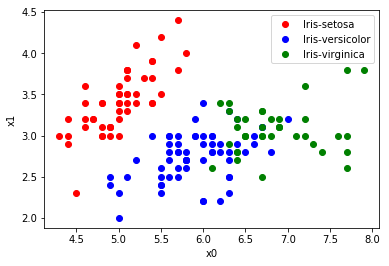

In [4]:
if __name__=='__main__':
    
    # Initial cluster center
    cluster_centers = [X[0], X[50], X[100]]

    # k-means
    inner_distance, epoch = [0]*3, 0
    while True:
        result = list()
        epoch+=1
        # classify by min distance
        for i, x in enumerate(X):
            distance = [np.sum((x-cluster_center)**2) for cluster_center in cluster_centers]
            result.append(distance.index(np.min(distance)))
        
        # update cluster center
        for i in range(len(cluster_centers)):
            cluster_centers[i] = np.mean([x for j, x in enumerate(X) if result[j]==i], axis=0)

        # Stop creatia
        _pre_inner_distance = list(inner_distance)
        for i, cluster_center in enumerate(cluster_centers):
            inner_distance[i] = np.sum([np.square(x-cluster_center) for j, x in enumerate(X) if result[j]==i])
        if(np.abs(np.sum(_pre_inner_distance)-np.sum(inner_distance))<0.1):
            break
    
    '''Show result'''
    # print epochs
    print('epochs: ' + str(epoch))
    print()
    
    # print cluster center
    print('Cluster centers')
    for i, cluster_center in enumerate(cluster_centers):
        print('Class' + str(i) + ': ' + str(cluster_center))
    print()

    # print cluster count
    print('Number of cluster-members')
    for i, cluster_center in enumerate(cluster_centers):
        print('Class' + str(i) + ': ' + str(len([x for j, x in enumerate(X) if result[j]==i])))
    print()

    # voting class name
    classDict = {}
    for i, cluster_center in enumerate(cluster_centers):
        Cluster = [y[j] for j, x in enumerate(X) if result[j]==i]
        count = sorted([[Cluster.count(c), c] for c in set(Cluster)], reverse=True)
        classDict[i] = count[0][1]
    print(classDict)
    print()
    
    # print classify fail
    print('Samples in wrong cluster')
    for i in range(3):
        classify_fail = len([1 for j in range(i*50, i*50+50) if y[j]!=classDict[result[j]]])
        print(str(y[i*50]) + ': ' + str(classify_fail))
        print([('Id:' + str(j) + ' in:' + str(classDict[result[j]])) for j in range(i*50, i*50+50) if y[j]!=classDict[result[j]]])
    
    # plot data
    style = ['or', 'ob', 'og']
    for i, cluster_center in enumerate(cluster_centers):
        X0_plot = [x[0] for j, x in enumerate(X) if result[j]==i]
        X1_plot = [x[1] for j, x in enumerate(X) if result[j]==i]
        plt.plot(X0_plot, X1_plot, style[i], label = classDict[i])
    plt.legend()
    plt.xlabel('x0') 
    plt.ylabel('x1')
    plt.show()

**3. We know that the GMM can be viewed as a “soft” clustering method. To simplify the difficulty level, we will implement the univariate GMM. Use the third feature (petal length) as the input to your GMM. The settings are three
Gaussians with the following initial values: μ1 = 1, μ2 = 4, μ3 = 6, σ1^2 = σ2^2 = σ3^2 = 1, α1 = 0.5, α2 = α3 = 0.25. To have a unique answer, iterate the EM steps 3,000 times (epochs). (a) Print out the GMM parameters. (b) If you want to convert the “soft” clustering results to “hard” clustering ones, how do you do it? (c) Use your method in (b) to find the number of members in each cluster.**

Select Iris petal length as train data and plot it

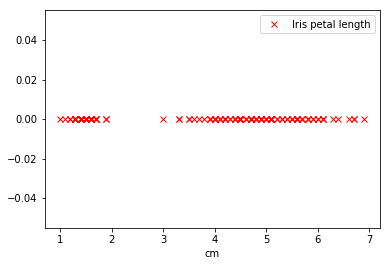

In [5]:
if __name__=='__main__':
    X_gmm = X[:, 2]
    plt.plot(X_gmm, [0]*150, 'xr', label = 'Iris petal length')
    plt.legend()
    plt.xlabel('cm') 
    plt.show()

(a) Print out the GMM parameters.

In [6]:
def GaussianPDF(x, mu, var):
    return np.exp(-np.square(x-mu)/(2*var))/np.sqrt(2*np.pi*var)

if __name__=='__main__':
    # set init value for GMM
    mu = np.array([1., 4., 6.])
    var = np.array([1., 1., 1.])
    alpha = np.array([0.5, 0.25, 0.25])
    beta = np.zeros((150, 3))

    # Do the EM step in 3000 times
    for epoch in range(3000):
        # calculate beta for all of x
        for i, x in enumerate(X_gmm):
            for j in range(3):
                beta[i][j] = alpha[j]*GaussianPDF(x, mu[j], var[j])\
                /np.sum([alpha[k]*GaussianPDF(x, mu[k], var[k]) for k in range(3)])
        # calculate mu for 3 class
        for j in range(3):
            mu[j] = np.sum([beta[i][j]*x for i, x in enumerate(X_gmm)])/np.sum(beta[:, j])
        # calculate var for 3 class
        for j in range(3):
            var[j] = np.sum([beta[i][j]*np.square(x-mu[j]) for i, x in enumerate(X_gmm)])/np.sum(beta[:, j])
        # calculate alpha for 3 class
        for j in range(3):
            alpha[j] = np.sum(beta[:, j])/len(X_gmm)
    
    # Print out the GMM parameters
    print('mu =', mu)
    print('var =', var)
    print('alpha =', alpha)

mu = [1.4639669  4.5984658  5.81463145]
var = [0.02949217 0.42374785 0.31299237]
alpha = [0.33330614 0.49817358 0.16852029]


(b) If you want to convert the “soft” clustering results to “hard” clustering ones, how do you do it?  
> For a unknow data x, put x into likelihood function for each model. Classify x belonging to the class with highest likelihood.

(c) Use your method in (b) to find the number of members in each cluster.

In [7]:
if __name__=='__main__':
    result = list(np.argsort(beta)[:, 2])
    class_number_count = [result.count(i) for i in range(3)]
    print('Number of members in each cluster:')
    for i in range(3):
        print('Cluster', i, ':', class_number_count[i])

Number of members in each cluster:
Cluster 0 : 50
Cluster 1 : 75
Cluster 2 : 25


**4. We used the play/no play example in the lecture. You are required to write a program to compute the C 4.5 decision tree with the “play/no play” data given in the PPT file. Plot the computed decision tree. In this problem, you need to convert continuous variables of temperature and humidity to discrete values according to the rules given in the PPT file.**

Decision Tree C4.5

In [8]:
if __name__=='__main__':
    # load data from local
    df = pd.read_csv('play_noPlay_discrete.csv')
    print(df)
    X_tree = df.loc[:, df.columns != 'play']
    y_tree = df['play']
    X_tree = pd.get_dummies(X_tree)
    print(X_tree)
    print(y_tree)
    
    # code the play/no plat to 1 and 0
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    y_tree = le.fit_transform(y_tree.values)
    
    # creat and train DecisionT ree
    from sklearn import tree
    dtree = tree.DecisionTreeClassifier(criterion = "entropy")
    dtree = dtree.fit(X_tree, y_tree)
    
    # save Decision Tree as a dot file
    with open("tree.dot", 'w') as dotfile:
        tree.export_graphviz(dtree, out_file = dotfile, feature_names = X_tree.columns)

# Use Graphviz Shell tools to create png tree pic
!dot -Tpng tree.dot -o tree.png

     outlook   temp humidity  windy    play
0      sunny    hot     high  False  NoPlay
1      sunny    hot     high   True  NoPlay
2   overcast    hot     high  False    Play
3      rainy  sweet     high  False    Play
4      rainy   cool      low  False    Play
5      rainy   cool      low   True  NoPlay
6   overcast   cool      low   True    Play
7      sunny  sweet     high  False  NoPlay
8      sunny   cool      low  False    Play
9      rainy  sweet      low  False    Play
10     sunny  sweet      low   True    Play
11  overcast  sweet     high   True    Play
12  overcast    hot      low  False    Play
13     rainy  sweet     high   True  NoPlay
    windy  outlook_overcast  outlook_rainy  outlook_sunny  temp_cool  \
0   False                 0              0              1          0   
1    True                 0              0              1          0   
2   False                 1              0              0          0   
3   False                 0              1          

![](tree.png)

**5. Based on your C4.5 program on problem 4, revise it to accept continuous values of temperature and humidity. Inside your program, there must be a routine to convert each continuous number into three values, namely, low, mid, and high, based on maximizing gains. (a) Use a pseudo code to explain how to perform the computation. (b) Run your program to print out the conversion rules (such as temperature greater than xx is hot) and (c) draw the decision tree.**

In [9]:
if __name__=='__main__':
    # load data from local
    df = pd.read_csv('play_noPlay.csv')
    X_tree = df.loc[:, df.columns != 'play']
    y_tree = df['play']
    print(df)
    
    # code the play/no plat to 1 and 0
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    X_tree['outlook'] = le.fit_transform(X_tree['outlook'])
    X_tree['windy'] = le.fit_transform(X_tree['windy'])
    y_tree = le.fit_transform(y_tree.values)
    print(X_tree)
    print(y_tree)
    
    # creat and train DecisionT ree
    from sklearn import tree
    dtree = tree.DecisionTreeClassifier(criterion = "entropy")
    dtree = dtree.fit(X_tree, y_tree)
    
    # save Decision Tree as a dot file
    with open("tree.dot", 'w') as dotfile:
        tree.export_graphviz(dtree, out_file = dotfile, feature_names = X_tree.columns)

# Use Graphviz Shell tools to create png tree pic
!dot -Tpng tree.dot -o tree2.png

     outlook  temp  humidity  windy    play
0      sunny    85        85  False  NoPlay
1      sunny    80        90   True  NoPlay
2   overcast    83        78  False    Play
3       rain    70        96  False    Play
4       rain    68        80  False    Play
5       rain    65        70   True  NoPlay
6   overcast    64        65   True    Play
7      sunny    72        95  False  NoPlay
8      sunny    69        70  False    Play
9       rain    75        80  False    Play
10     sunny    75        70   True    Play
11  overcast    72        90   True    Play
12  overcast    81        75  False    Play
13      rain    71        80   True  NoPlay
    outlook  temp  humidity  windy
0         2    85        85      0
1         2    80        90      1
2         0    83        78      0
3         1    70        96      0
4         1    68        80      0
5         1    65        70      1
6         0    64        65      1
7         2    72        95      0
8         2    69        

/home/wei/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/wei/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


![](tree2.png)

In [10]:
# del tree cache file
! rm tree*